In [1]:
import csv
import sys
import numpy as np
import math
import networkx
import matplotlib.pyplot as plt

In [2]:
# increase field size to accomodate very high dimensional csv data
csv.field_size_limit(25000)

131072

In [3]:
centroidsPath = './centroids.csv'

centroids = []
with open(centroidsPath, newline='') as csvfile:
    csvReader = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(csvReader)
    for r in csvReader:
      row = []
      for c in r:
        row.append(float(c))
      centroids.append(row)

centroids = np.array(centroids)
centroids = np.delete(centroids, 0, 1) # Delete first column, which is the cluster labels
print(centroids.shape) # Should be (10, 23579) for (clusters, genes)

(10, 23579)


In [4]:
# compute euclidean distances between cluster centroids
def computeDistance(centroids):
  distances = [[0 for _ in range(len(centroids))] for _ in range(len(centroids))]
  for i in range(len(centroids)):
    for j in range(len(centroids)):
      curDistance = 0
      for gene in range(len(centroids[0])):
        curDistance += (centroids[i][gene] - centroids[j][gene])**2
      distance = math.sqrt(curDistance)
      distances[i][j] = distance
      distances[j][i] = distance
  return distances

distances = computeDistance(centroids)


In [5]:
# create graph
V = set(range(len(centroids)))
E = set()
for i in range(len(distances)):
  for j in range(i, len(distances)):
    dist = distances[i][j]
    if dist != 0:
      E.add((dist, i, j))

In [6]:
def kruskals(V, E):
  MST = set()
  unionFind = {}
  setCounts = [0 for _ in range(len(V))]

  for vertex in V:
    unionFind[vertex] = vertex
    setCounts[vertex] = 1

  sortedEdges = sorted(E)
  for (dist, v1, v2) in sortedEdges:

    # check if added edge creates a cycle
    set1, set2 = unionFind[v1], unionFind[v2]
    if set1 != set2:
      
      # add to current MST
      MST.add((dist,v1,v2))

      # Merge unionFind sets after adding edge
      if setCounts[v1] < setCounts[v2]:
        setCounts[v2] += setCounts[v1]
        setCounts[v1] = 0
        for u in unionFind:
          if unionFind[u] == set1:
            unionFind[u] = set2
      else:
        setCounts[v1] += setCounts[v2]
        setCounts[v2] = 0
        for u in unionFind:
          if unionFind[u] == set2:
            unionFind[u] = set1

  return MST

MST = kruskals(V, E)
print(len(MST), MST)

9 {(123.18337701090606, 1, 2), (145.05930498527115, 4, 5), (191.08389318709703, 5, 7), (118.22320510157603, 1, 9), (124.43346966006608, 2, 6), (167.62043302623061, 0, 3), (137.03663559985554, 2, 8), (168.8210961343398, 3, 4), (121.16725821281057, 5, 9)}


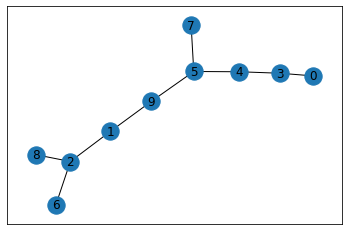

In [7]:
# visualize graph
MSTEdges = [(i,j) for (dist,i,j) in MST]

G = networkx.Graph()
G.add_edges_from(MSTEdges)
networkx.draw_networkx(G)
plt.show()